<a href="https://colab.research.google.com/github/richardenrico/Machine-Learning-Assignment/blob/main/Tugas02-ML-H071191055.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [86]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [87]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
df.drop(['Gender', 'CustomerID'], axis=1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [89]:
data = pd.DataFrame(df)
data.columns = df.columns

data_cluster = data.copy()

In [90]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# K-Means

Text(0, 0.5, 'Inertia')

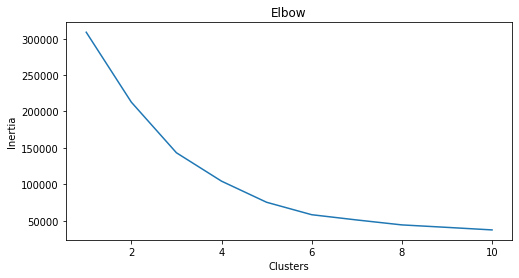

In [91]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Dari hasil metode elbow di atas, dapat kita lihat bahwa terdapat 6 cluster.

In [92]:
model_kmeans = KMeans(n_clusters=6)

model_kmeans.fit(data)

data_cluster['cluster_kmeans'] = model_kmeans.labels_

data_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans
0,19,15,39,3
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



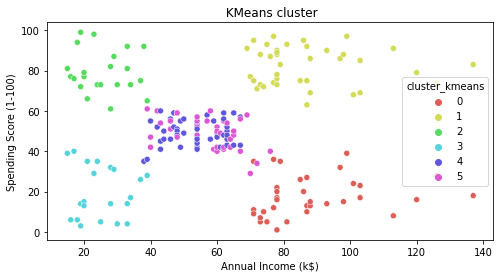

In [93]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Annual Income (k$)'], 
                data_cluster['Spending Score (1-100)'], 
                hue=data_cluster['cluster_kmeans'], 
                palette=sns.color_palette('hls',6))
plt.title(' KMeans cluster')

plt.show()

# K-Medoids

In [94]:
!pip install scikit-learn-extra

In [95]:
from sklearn_extra.cluster import KMedoids

In [96]:
model_kmedoids = KMedoids(n_clusters=6, method='pam').fit(data)
data_cluster['cluster_kmedoids'] = model_kmedoids.labels_
data_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans,cluster_kmedoids
0,19,15,39,3,3
1,21,15,81,2,3
2,20,16,6,3,5
3,23,16,77,2,3
4,31,17,40,3,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



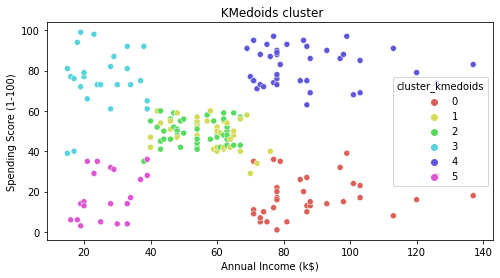

In [97]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Annual Income (k$)'], 
                data_cluster['Spending Score (1-100)'], 
                hue=data_cluster['cluster_kmedoids'], 
                palette=sns.color_palette('hls',6))
plt.title(' KMedoids cluster')

plt.show()

# Hierarchy

In [98]:
from scipy.cluster.hierarchy import linkage, dendrogram

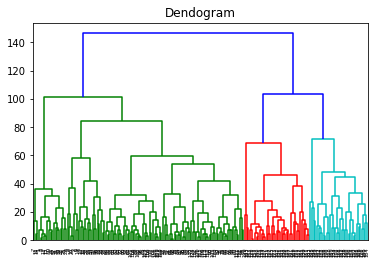

In [99]:
mergings_complete = linkage(data, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Dendogram")
plt.show()

In [100]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
agglo.fit_predict(data)

data_cluster['cluster_hierarchy'] = agglo.labels_

data_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans,cluster_kmedoids,cluster_hierarchy
0,19,15,39,3,3,4
1,21,15,81,2,3,3
2,20,16,6,3,5,4
3,23,16,77,2,3,3
4,31,17,40,3,3,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



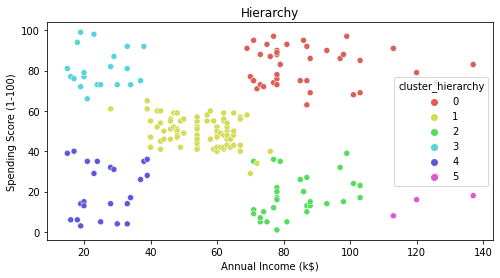

In [101]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Annual Income (k$)'], 
                data_cluster['Spending Score (1-100)'], 
                hue=data_cluster['cluster_hierarchy'], 
                palette=sns.color_palette('hls',6))
plt.title('Hierarchy')

plt.show()

# DBSCAN

In [102]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [103]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

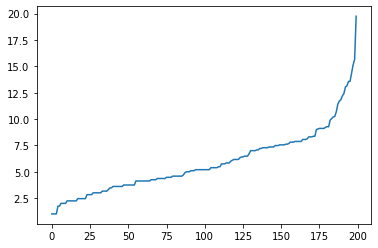

In [104]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [237]:
db = DBSCAN(eps=9.43, min_samples=6)
db.fit(data)

data_cluster['cluster_dbscan'] = db.labels_
data_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans,cluster_kmedoids,cluster_hierarchy,cluster_dbscan
0,19,15,39,3,3,4,-1
1,21,15,81,2,3,3,0
2,20,16,6,3,5,4,-1
3,23,16,77,2,3,3,0
4,31,17,40,3,3,4,-1


In [238]:
data_cluster.describe()

,Age,Annual Income (k$),Spending Score (1-100),cluster_kmeans,cluster_kmedoids,cluster_hierarchy,cluster_dbscan
count,200.000000,200.000000,200.000000,200.00000,200.0000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,2.58000,2.2800,1.585000,0.680000
std,13.969007,26.264721,25.823522,1.81385,1.6201,1.331027,1.834236
min,18.000000,15.000000,1.000000,0.00000,0.0000,0.000000,-1.000000
25%,28.750000,41.500000,34.750000,1.00000,1.0000,1.000000,-1.000000
50%,36.000000,61.500000,50.000000,3.00000,2.0000,1.000000,1.000000
75%,49.000000,78.000000,73.000000,4.00000,4.0000,2.000000,2.000000
max,70.000000,137.000000,99.000000,5.00000,5.0000,5.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



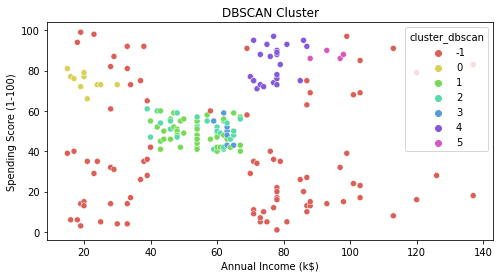

In [239]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['Annual Income (k$)'], 
                data_cluster['Spending Score (1-100)'], 
                hue=data_cluster['cluster_dbscan'], 
                palette=sns.color_palette('hls',7))
plt.title('DBSCAN Cluster')

plt.show()